<a href="https://colab.research.google.com/github/muktasidrahman/Micro_credentials/blob/main/Copy_of_Covid_19_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1
#setup environment importing all the python libraries needed to complete the task

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import data / data collection
df = pd.read_csv("http://avijitroy.com/microCred6/covid.csv")

df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
927003,2021-01-13,Sweetwater,Wyoming,56037.0,3222,26.0
927004,2021-01-13,Teton,Wyoming,56039.0,2502,4.0
927005,2021-01-13,Uinta,Wyoming,56041.0,1774,9.0
927006,2021-01-13,Washakie,Wyoming,56043.0,829,23.0


In [ ]:
# 2
# Filter the data by NY State
ny_state = df[df['state'] == 'New York']
ny_state

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
519,2020-03-04,Westchester,New York,36119.0,9,0.0
...,...,...,...,...,...,...
925661,2021-01-13,Washington,New York,36115.0,1313,20.0
925662,2021-01-13,Wayne,New York,36117.0,3395,48.0
925663,2021-01-13,Westchester,New York,36119.0,80145,1750.0
925664,2021-01-13,Wyoming,New York,36121.0,1905,36.0


In [ ]:
# 3
# Sort NY State Data using County Names

ny_state.sort_values(by=['county'], ascending=True)

,date,county,state,fips,cases,deaths
529844,2020-09-13,Albany,New York,36001.0,2915,123.0
204737,2020-06-03,Albany,New York,36001.0,1920,145.0
756841,2020-11-22,Albany,New York,36001.0,5108,136.0
397467,2020-08-03,Albany,New York,36001.0,2531,170.0
620564,2020-10-11,Albany,New York,36001.0,3293,124.0
...,...,...,...,...,...,...
102727,2020-04-30,Yates,New York,36123.0,18,1.0
378222,2020-07-28,Yates,New York,36123.0,52,6.0
627106,2020-10-13,Yates,New York,36123.0,77,6.0
108456,2020-05-02,Yates,New York,36123.0,18,1.0


In [ ]:
# 4
# Get NYC County Data
nyc = df[(df['county'] == 'New York City')]
nyc

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
565,2020-03-05,New York City,New York,NaN,4,0.0
...,...,...,...,...,...,...
912655,2021-01-09,New York City,New York,NaN,481279,25505.0
915900,2021-01-10,New York City,New York,NaN,487551,25562.0
919145,2021-01-11,New York City,New York,NaN,493306,25635.0
922390,2021-01-12,New York City,New York,NaN,498877,25698.0


In [ ]:
# 5
# if(nyc['cases'] == 1):
#   nyc['daily cases'] = 1
# else:
nyc['daily cases'] = nyc.cases.diff()
nyc['daily deaths'] = nyc.deaths.diff()
print(nyc)

# # nyc.loc['2020-03-01']['cases']
# for i in range(1, len(nyc)):
#   nyc.loc[i,'daily_cases'] = (nyc.loc[i-1,'cases']) -  (nyc.loc[i,'cases'])

              date         county     state  ...   deaths  daily cases  daily deaths
416     2020-03-01  New York City  New York  ...      0.0          NaN           NaN
448     2020-03-02  New York City  New York  ...      0.0          0.0           0.0
482     2020-03-03  New York City  New York  ...      0.0          1.0           0.0
518     2020-03-04  New York City  New York  ...      0.0          0.0           0.0
565     2020-03-05  New York City  New York  ...      0.0          2.0           0.0
...            ...            ...       ...  ...      ...          ...           ...
912655  2021-01-09  New York City  New York  ...  25505.0       6940.0          52.0
915900  2021-01-10  New York City  New York  ...  25562.0       6272.0          57.0
919145  2021-01-11  New York City  New York  ...  25635.0       5755.0          73.0
922390  2021-01-12  New York City  New York  ...  25698.0       5571.0          63.0
925636  2021-01-13  New York City  New York  ...  25741.0       5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
nyc_30days = nyc.sort_values(by=['date'], ascending=True)
nyc_30days

,date,county,state,fips,cases,deaths,daily cases,daily deaths
416,2020-03-01,New York City,New York,NaN,1,0.0,NaN,NaN
448,2020-03-02,New York City,New York,NaN,1,0.0,0.0,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0,1.0,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0,0.0,0.0
565,2020-03-05,New York City,New York,NaN,4,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...
912655,2021-01-09,New York City,New York,NaN,481279,25505.0,6940.0,52.0
915900,2021-01-10,New York City,New York,NaN,487551,25562.0,6272.0,57.0
919145,2021-01-11,New York City,New York,NaN,493306,25635.0,5755.0,73.0
922390,2021-01-12,New York City,New York,NaN,498877,25698.0,5571.0,63.0


In [ ]:
nyc_30days2.tail(30)

,date,county,state,fips,cases,deaths,daily cases,daily deaths
831522,2020-12-15,New York City,New York,NaN,367198,24561.0,3529.0,35.0
834768,2020-12-16,New York City,New York,NaN,370109,24578.0,2911.0,17.0
838014,2020-12-17,New York City,New York,NaN,373320,24613.0,3211.0,35.0
841259,2020-12-18,New York City,New York,NaN,377728,24652.0,4408.0,39.0
844505,2020-12-19,New York City,New York,NaN,381067,24677.0,3339.0,25.0
847750,2020-12-20,New York City,New York,NaN,383808,24697.0,2741.0,20.0
850995,2020-12-21,New York City,New York,NaN,387595,24735.0,3787.0,38.0
854240,2020-12-22,New York City,New York,NaN,391634,24768.0,4039.0,33.0
857485,2020-12-23,New York City,New York,NaN,395810,24790.0,4176.0,22.0
860730,2020-12-24,New York City,New York,NaN,401251,24842.0,5441.0,52.0


In [ ]:
# NYC recent 30 Days data
nyc_30days2 =  nyc[(nyc['date'] >= '2020-12-14') \
                  & (nyc['date'] <= '2021-01-13')]
nyc_30days2

,date,county,state,fips,cases,deaths,daily cases,daily deaths
828275,2020-12-14,New York City,New York,NaN,363669,24526.0,2969.0,25.0
831522,2020-12-15,New York City,New York,NaN,367198,24561.0,3529.0,35.0
834768,2020-12-16,New York City,New York,NaN,370109,24578.0,2911.0,17.0
838014,2020-12-17,New York City,New York,NaN,373320,24613.0,3211.0,35.0
841259,2020-12-18,New York City,New York,NaN,377728,24652.0,4408.0,39.0
844505,2020-12-19,New York City,New York,NaN,381067,24677.0,3339.0,25.0
847750,2020-12-20,New York City,New York,NaN,383808,24697.0,2741.0,20.0
850995,2020-12-21,New York City,New York,NaN,387595,24735.0,3787.0,38.0
854240,2020-12-22,New York City,New York,NaN,391634,24768.0,4039.0,33.0
857485,2020-12-23,New York City,New York,NaN,395810,24790.0,4176.0,22.0


In [ ]:
 nyc_death = nyc_30days2[['state','daily deaths']]

In [ ]:
 nyc_death

,state,daily deaths
828275,New York,25.0
831522,New York,35.0
834768,New York,17.0
838014,New York,35.0
841259,New York,39.0
844505,New York,25.0
847750,New York,20.0
850995,New York,38.0
854240,New York,33.0
857485,New York,22.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


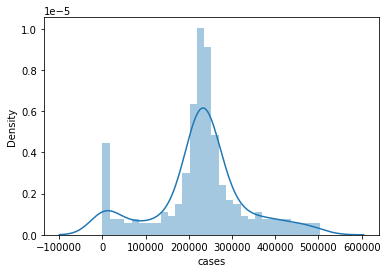

In [ ]:
sns.distplot(nyc['cases'],bins = 30) 

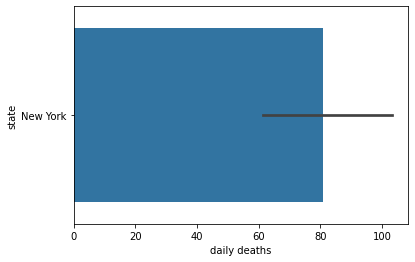

In [ ]:
sns.barplot(x='daily deaths',y='state', data = nyc)